# Air Pollution Data Exploration
##### In this notebook, I explore data on air pollution from data from the EPA on air pollution levels in the United States from 2000 to 2016. 
## Summary
#### Using Pandas, I clean the data, deal with missing values, and find the best way to group the data for analysis, by State and by site address (each place the EPA measures pollution data). After cleaning the data, I begin visualizing trends in pollution.
##### For a written walkthrough visit: https://sites.google.com/berkeley.edu/rudy-venguswamy/home/air-pollution-visualized

Data: https://kaggle.com/sogun3/uspollution

In [4]:
import pandas as pd               # Pandas lets us use dataframes
import numpy as np                # Numpy for math operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import os                         #Get the CSV from my computer
import datetime as dt
import statsmodels.api as sm


In [2]:
Pollution_File_Path = "pollution_us_2000_2016.csv" #Replace with your file directory for the pollution spreadsheet
pollution_data = pd.read_csv(Pollution_File_Path) 
pollution_data['DateTime'] = pollution_data.apply(lambda row: dt.datetime.strptime(row['Date Local'], '%Y-%m-%d'), axis = 1)
#First few rows of the data, with the date as a datetime object, which is easier to work with

In [3]:
#Do any addresses have more than one state or site number?
listaddress = pollution_data['Address'].unique()
for x in listaddress:
    addressdf =  pollution_data.loc[pollution_data['Address'] == x]
    y = addressdf['State Code'].nunique()
    z = addressdf['Site Num'].nunique()
    
    if (y != 1) or (z != 1):
        print('y: ' + str(y) + '|||||| z:' +str(z))
        print(addressdf['State Code'].unique())
        print(addressdf['Site Num'].unique())
print('Each address has only one site number assigned to it')
#Do any addresses share site numbers?
listsites = pollution_data['Site Num'].unique()
for x in listsites:
    sitedf = pollution_data.loc[pollution_data['Site Num'] == x]
    y = sitedf['Address'].nunique()
    if (y != 1):
        print('Multiple Addresses share the same site numbers')
        break

listcounty = pollution_data['County Code'].unique()
for x in listsites:
    sitedf = pollution_data.loc[pollution_data['County Code'] == x]
    y = sitedf['Address'].nunique()
    if (y != 1):
        print('Multiple Addresses share the same County Code')
        break        

###The result below shows that while each address has a consistent site number, each site can have multiple addresses
###To clean our data, we want to group our data by each address as site number is unreliable. A google search shows some
#addresses in CA are over 300 miles apart but are part of the same 'Site Number'

Each address has only one site number assigned to it
Multiple Addresses share the same site numbers
Multiple Addresses share the same County Code


In [82]:
#Group the data by address and date and get the average value if there are inconsistencies in the record
#Drops values that don't have any data for them.
pollution_data = pollution_data.groupby(['Address','DateTime'], as_index = False).mean()
pollution_data = pollution_data.drop('Unnamed: 0', axis = 1)

In [83]:
# Pollution Level by Gas & Year
pollution_data[0:2]



,Address,DateTime,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,6100 ARLINGTON BLVD MONTG WARD,2000-01-01,51.0,59.0,1004.0,31.000000,41.0,23.0,39.0,0.002750,...,11.0,5.0,11.645834,16.80,10.0,26.0,1.244518,1.50,2.5,16.0
1,6100 ARLINGTON BLVD MONTG WARD,2000-01-02,51.0,59.0,1004.0,19.041667,36.0,0.0,34.0,0.020208,...,13.0,23.0,6.572916,9.65,5.0,14.0,1.054167,1.25,0.0,14.0


In [14]:
#Create a plot of pollution for a given year and Gas
#Gases are 'NO2,' 'SO2', 'CO','O3'
def pollution_by_year(Gas, Year):
    maxhr = Gas + ' 1st Max Hour'
    maxval =  Gas + ' 1st Max Value'
    meanval =  Gas + ' Mean'
    fig, ax = plt.subplots(figsize=(10,5))
    pollutionyr = pollution_data[pollution_data.apply(lambda x: x['DateTime'].year == Year, axis=1)]
    pollutionyr.groupby('DateTime').mean()[meanval].plot(ax = ax)

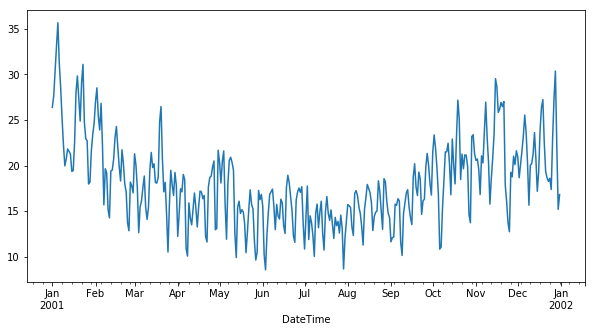

In [17]:
pollution_by_year('NO2', 2001)

### Now that we've explored the data a little, I want to see if we can stratify pollution by state and visualize changes. That can be found in the "Air Pollution by state & Year File".